# Séance 2 : Introduction aux SIG 
 
### SIG et Géomatique – Travaux Pratiques
O. Kaufmann, 2020, 2023.


In [1]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


***
## 1. Imports

In [2]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np

***
## 2. Partie 1 - QGIS

<div class="alert alert-block alert-success">
	<b>2.1 Préparation</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>1. Ouvrir une nouvelle carte dans QGIS. Définir le CRS de la carte en coordonnées Lambert Belge 72. Y ajouter les cartes topographiques 58_5 et 58_6.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>2. Ajouter l’extrait de la carte géologique au 1/40.000 de la région référencée à la séance précédente (une carte nommée cartegeol_modified.tif est mise à votre disposition si vous ne souhaitez pas continuer avec le résultat que vous avez obtenu lors de la séance précédente).
</div>

<div class="alert alert-block alert-success">
	<b>2.2 Vectoriser les aires d’affleurement des étages du Primaire dans une aire d’intérêt </b>
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>1. Créer une couche figurant l’extension de l’aire d’intérêt dans le geopackage et la nommer aoi.
    
    aoi : 168200 m <XL< 173200 m ; 85500 m <YL< 88000 m.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>2. Avant de débuter l’édition ajouter les plug-ins ‘Geometry checker’ et ‘Topology checker’ charger la barre d’outils ‘advanced digitizing tools’ et examiner les options d’édition. Examiner les options de ‘snapping’ et d’édition topologique.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>3. Créer la couche ‘etages’ pour y stocker les aires d’affleurement. Démarrer en créant une zone couvrant toute l’aire d’intérêt, puis procéder en la découpant selon les limites entre étages. Stocker l’abréviation associée à l’étage géologique dans un attribut (Les abréviations sont parfois peu lisibles. Les valeurs rencontrées sont Fr1p, Fr1m, Fr1o, Gvb, Gva, Cobm, Cobn, Coa et Bt.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>4. Utiliser les outils d’édition topologiques pour contrôler le résultat, notamment l’absence de trous et de recouvrement et pour modifier les frontières là où c’est nécessaire.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>5. Une fois tous les ensembles de la zone vectorisés, calculer l’aire occupée par chacune des surfaces crées et l'ajouter dans un champ.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>6. Vectoriser également le tracé des filons minéralisés dans cette zone en distinguant les tracés en trait plein des tracés hypothétiques en pointillés et en indiquant le type de minéralisation que l’on y rencontre (Py : pyrite, Fe : oxydes de Fer, Ba : Barite, Pb : galène...). Assurez-vous que le SCR de la couche est en Lambert 72.
</div>

<div class="alert alert-block alert-success">
	<b>2.3 Analyser et traiter des informations (Vecteur)</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>1. En utilisant les outils de geoprocessing, construire une zone tampon de 50m de part et d’autre des filons.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>2. Sélectionner les zones où l’étage Givétien affleure et situées à 50m au plus d’un filon minéralisé en plomb (Pb sur la carte). Sauvez la sélection comme une nouvelle couche nommée ‘Pb_Gv’ dans le geopackage.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>3. Calculer l’aire correspondant à cette sélection spatiale.
</div>

***
## 3. Partie 2 - Notebook

<div class="alert alert-block alert-success">
	<b>3.1 Préparation</b>
</div>

In [3]:
geology_geopackage = 'Data/geol.gpkg' # mettre ici le chemin relatif vers votre geopackage
layer = 'etages' # mettre ici le nom de la couche où les polygones relatifs aux différents étages géologiques ont été stockés
mesures_filename = 'Data/mesures.csv' # mettre ici le chemin relatif vers le fichier des mesures

<div class="alert alert-block alert-warning">
<b>Question: </b><br>1. Charger la couche des étages géologiques dans un GéoDataframe depuis le geopackage téléchargé
</div>

In [ ]:
# Résultat attendu ci-dessous...

,Etage,Aire,geometry
0,Gva,1.539277e+06,"POLYGON ((172200.000 88000.000, 171970.000 878..."
1,Fr1p,1.188538e+06,"POLYGON ((168200.000 87540.000, 168520.000 876..."
2,Fr1m,3.027757e+05,"POLYGON ((171160.000 88000.000, 171080.000 879..."
3,Fr1m,3.950200e+04,"POLYGON ((169820.000 88000.000, 169750.000 879..."
4,Fr1m,1.878639e+05,"POLYGON ((168200.000 87830.000, 168270.000 878..."


<div class="alert alert-block alert-warning">
<b>Question: </b><br>2. Affichez une carte des étages
</div>

<AxesSubplot:>

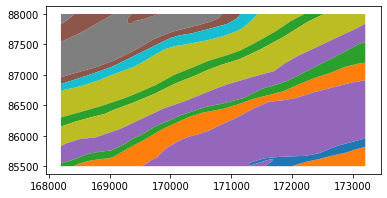

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question: </b><br>3. Créer un ensemble de stations réparties tous les 50m sur un profil de 2 km de long ayant pour origine le point de coordonnées (171000, 86000) dans le système EPSG:31300 et d'Azimut N330°
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br> Créer tout d'abord un vecteur reprenant les distances à l'origine des différentes stations du profil dans un repère local.  <br>
Attention, on souhaite une station à chacune des deux extrémités du profil.
</div>

In [ ]:
# Résultat attendu ci-dessous...

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000])

<div class="alert alert-block alert-info">
<b>Info:</b><br> Créer ensuite les vecteurs XL et YL reprenant les coordonnées des mesures dans le repère global dans le système EPSG:31370.
</div>

In [8]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e584c5f6f726967696e203d203137313030302e3c62723e0a594c5f6f726967696e203d2038363030302e3c62723e0a617a696d7574203d203333302e2a6e702e70692f3138302e202320616e676c652065787072696dc3a920656e2072616469616e730a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [9]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e584c203d20584c5f6f726967696e2b642a6e702e73696e28617a696d7574293c62723e0a584c0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [ ]:
# Résultat attendu ci-dessous...

array([86000.        , 86043.30127019, 86086.60254038, 86129.90381057,
       86173.20508076, 86216.50635095, 86259.80762114, 86303.10889132,
       86346.41016151, 86389.7114317 , 86433.01270189, 86476.31397208,
       86519.61524227, 86562.91651246, 86606.21778265, 86649.51905284,
       86692.82032303, 86736.12159322, 86779.42286341, 86822.7241336 ,
       86866.02540378, 86909.32667397, 86952.62794416, 86995.92921435,
       87039.23048454, 87082.53175473, 87125.83302492, 87169.13429511,
       87212.4355653 , 87255.73683549, 87299.03810568, 87342.33937587,
       87385.64064606, 87428.94191624, 87472.24318643, 87515.54445662,
       87558.84572681, 87602.146997  , 87645.44826719, 87688.74953738,
       87732.05080757])

<div class="alert alert-block alert-info">
<b>Info:</b><br> Rassemblez toutes les informations dans un Dataframe.
</div>

In [12]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6466203d2070642e446174614672616d652e66726f6d5f64696374287b2764697374616e6365273a642c2027584c273a584c2c2027594c273a594c207d293c62723e0a64662e7365745f696e646578282764697374616e6365272c20696e706c6163653d54727565293c62723e0a64662e68656164283130290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [ ]:
# Résultat attendu ci-dessous...

,XL,YL
distance,,
0,171000.0,86000.000000
50,170975.0,86043.301270
100,170950.0,86086.602540
150,170925.0,86129.903811
200,170900.0,86173.205081
250,170875.0,86216.506351
300,170850.0,86259.807621
350,170825.0,86303.108891
400,170800.0,86346.410162


<div class="alert alert-block alert-warning">
<b>Question: </b><br>4. Charger le fichier 'mesures.csv' 
</div>

In [ ]:
# Résultat attendu ci-dessous...

,mesure
d,
0,6.698253
50,-1.181209
100,-3.078386
150,-31.438602
200,-25.528216
250,-21.775117
300,-58.664446
350,-13.240636
400,-22.968503


<div class="alert alert-block alert-warning">
<b>Question: </b><br>5. Faire une jointure entre les deux dataframes
</div>

In [ ]:
# Résultat attendu ci-dessous...

,XL,YL,mesure
distance,,,
0,171000.0,86000.000000,6.698253
50,170975.0,86043.301270,-1.181209
100,170950.0,86086.602540,-3.078386
150,170925.0,86129.903811,-31.438602
200,170900.0,86173.205081,-25.528216
250,170875.0,86216.506351,-21.775117
300,170850.0,86259.807621,-58.664446
350,170825.0,86303.108891,-13.240636
400,170800.0,86346.410162,-22.968503


<div class="alert alert-block alert-warning">
<b>Question: </b><br>6. Créer un geodataframe avec le résultat de l'étape précédente
</div>

In [15]:
gpd.points_from_xy?

<AxesSubplot:>

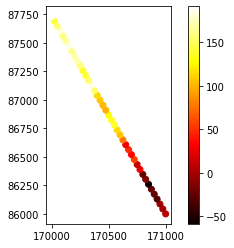

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question: </b><br>7. Superposer les points sur la carte et afficher une légende
</div>

In [18]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e626173656d6170203d206574616765732e706c6f7428636f6c756d6e3d274574616765272c2066696773697a653d2831362c313029293c62723e0a73746174696f6e732e706c6f742861783d626173656d61702c20636f6c756d6e3d276d6573757265272c20636d61703d27686f74272c206c6567656e643d54727565292023206166666963686572206c657320706f696e7473206176656320756e6520636f756c657572207175692064c3a970656e64206465206c61206d65737572652c207574696c69736572206c612027636f6c6f726d61702720276a657427206574206166666963686572206c612027636f6c6f72626172270a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<AxesSubplot:>

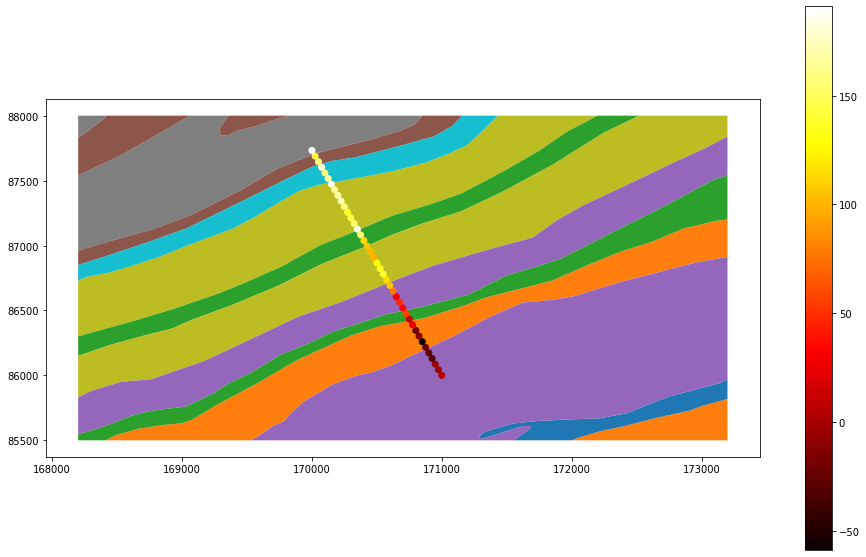

In [ ]:
# Résultat attendu ci-dessous...

### Sauvegarder les points dans un geopackage

In [19]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e73746174696f6e732e746f5f66696c65282773746174696f6e732e67706b67272c206472697665723d2247504b4722290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


### Recharger la couche dans le projet QGIS